In [1]:
import yfinance as yf  
import pandas as pd
import seaborn as sns
import plotly.express as px
%matplotlib inline
#import data
stocks = yf.download(['SPY','PFE','MRNA','JNJ'],
                     '2020-01-01','2022-01-01')
covid = pd.read_csv('~/projects/portfolio/us_covid_cases.csv')

[*********************100%***********************]  4 of 4 completed


## Preparing Data

In [2]:
#calculating daily covid data
covid['daily_cases']= covid['cases'].diff()
covid['daily_deaths']= covid['deaths'].diff()
#filling in null rows
covid.at[0,'daily_cases'] = 1
covid.at[0,'daily_deaths'] = 0

#calculating rolling averages
covid['cases_7day']= covid['daily_cases'].rolling(7).mean()
covid['deaths_7day']= covid['daily_deaths'].rolling(7).mean()

#setting index to be the date
covid.set_index('date', inplace=True)

#making index names consistent
stocks = stocks.rename_axis('date')

## Exploring & Visualizing Data

In [3]:
stocks['Adj Close'].head()

,JNJ,MRNA,PFE,SPY
date,,,,
2020-01-02,138.613358,19.230000,34.074841,314.719177
2020-01-03,137.008575,18.889999,33.892029,312.336060
2020-01-06,136.837677,18.129999,33.848495,313.527649
2020-01-07,137.673264,17.780001,33.735313,312.646088
2020-01-08,137.654297,17.980000,34.005196,314.312378


In [4]:
covid.head(10)

,cases,deaths,daily_cases,daily_deaths,cases_7day,deaths_7day
date,,,,,,
2020-01-21,1,0,1.0,0.0,NaN,NaN
2020-01-22,1,0,0.0,0.0,NaN,NaN
2020-01-23,1,0,0.0,0.0,NaN,NaN
2020-01-24,2,0,1.0,0.0,NaN,NaN
2020-01-25,3,0,1.0,0.0,NaN,NaN
2020-01-26,5,0,2.0,0.0,NaN,NaN
2020-01-27,5,0,0.0,0.0,0.714286,0.0
2020-01-28,5,0,0.0,0.0,0.571429,0.0
2020-01-29,5,0,0.0,0.0,0.571429,0.0


In [5]:
#joining all data together
adj_close = stocks['Adj Close']
adj_close = adj_close.reset_index()
covid_d = covid.reset_index()
covid_d['date'] = covid_d['date'].astype('datetime64')

data = pd.merge(left= adj_close, right= covid_d,
                on='date',
                how='left'
               )
data = data.set_index('date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-01-02 to 2021-12-31
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JNJ           505 non-null    float64
 1   MRNA          505 non-null    float64
 2   PFE           505 non-null    float64
 3   SPY           505 non-null    float64
 4   cases         493 non-null    float64
 5   deaths        493 non-null    float64
 6   daily_cases   493 non-null    float64
 7   daily_deaths  493 non-null    float64
 8   cases_7day    489 non-null    float64
 9   deaths_7day   489 non-null    float64
dtypes: float64(10)
memory usage: 43.4 KB


In [6]:
data.corr()

,JNJ,MRNA,PFE,SPY,cases,deaths,daily_cases,daily_deaths,cases_7day,deaths_7day
JNJ,1.000000,0.824111,0.753636,0.919205,0.881475,0.891088,0.422084,0.239912,0.374605,0.200812
MRNA,0.824111,1.000000,0.787094,0.867462,0.873562,0.863733,0.482249,0.255223,0.412328,0.164061
PFE,0.753636,0.787094,1.000000,0.843462,0.836557,0.813069,0.592942,0.209994,0.486377,0.119208
SPY,0.919205,0.867462,0.843462,1.000000,0.962982,0.967543,0.488992,0.208154,0.428302,0.136224
cases,0.881475,0.873562,0.836557,0.962982,1.000000,0.993206,0.489836,0.274986,0.423491,0.206973
deaths,0.891088,0.863733,0.813069,0.967543,0.993206,1.000000,0.462729,0.252470,0.398830,0.187032
daily_cases,0.422084,0.482249,0.592942,0.488992,0.489836,0.462729,1.000000,0.579271,0.945227,0.539489
daily_deaths,0.239912,0.255223,0.209994,0.208154,0.274986,0.252470,0.579271,1.000000,0.677852,0.905250
cases_7day,0.374605,0.412328,0.486377,0.428302,0.423491,0.398830,0.945227,0.677852,1.000000,0.673020
deaths_7day,0.200812,0.164061,0.119208,0.136224,0.206973,0.187032,0.539489,0.905250,0.673020,1.000000


<AxesSubplot:xlabel='cases', ylabel='JNJ'>

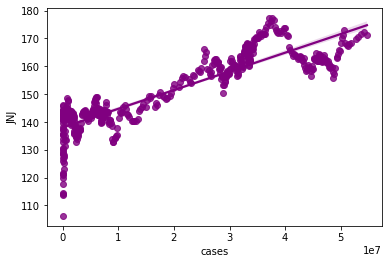

In [20]:
sns.regplot(data=data,y="JNJ", x="cases", color='purple')

<AxesSubplot:xlabel='cases', ylabel='SPY'>

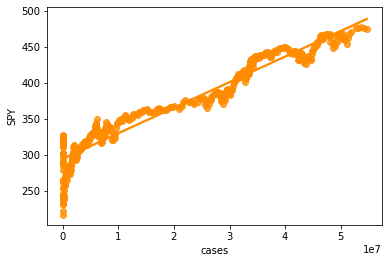

In [19]:
sns.regplot(data=data,y="SPY", x="cases", color='darkorange')

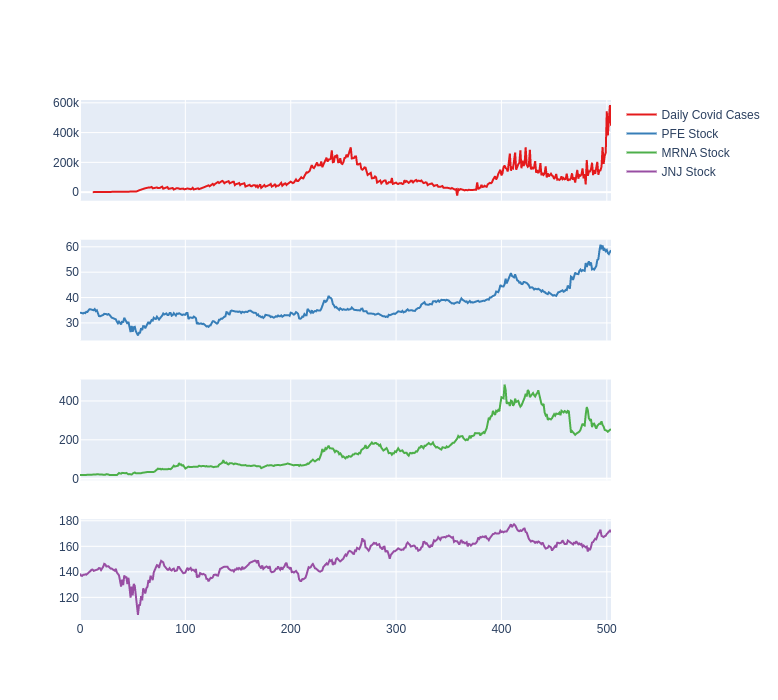

In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#initialize figure
fig = make_subplots(rows=4, shared_xaxes=True)
#adding subplots to 
fig.add_scatter(y= data['daily_cases'], row=1, col=1, name='Daily Covid Cases') 
fig.add_scatter(y= data['PFE'], row=2, col=1, name='PFE Stock')
fig.add_scatter(y= data['MRNA'], row=3, col=1, name='MRNA Stock')
fig.add_scatter(y= data['JNJ'], row=4, col=1, name='JNJ Stock')
fig.update_layout(height=700, colorway=px.colors.qualitative.Set1)

<AxesSubplot:xlabel='daily_cases', ylabel='PFE'>

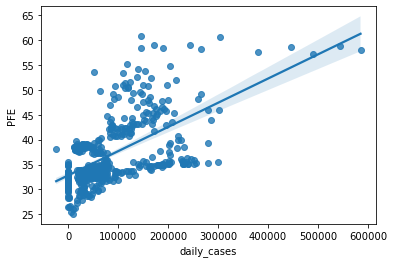

In [8]:
sns.regplot(data=data,y="PFE", x="daily_cases")

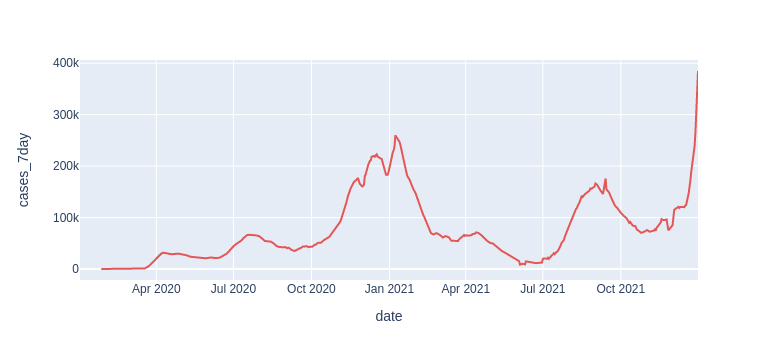

In [23]:
px.line(data_frame=data, y='cases_7day', color_discrete_sequence=[px.colors.qualitative.T10[2]])

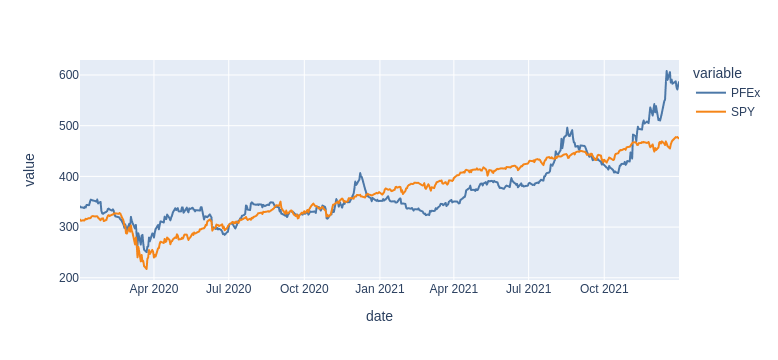

In [28]:
data = data.assign(PFEx = data['PFE']*10)
PFE_SPY = data[['PFEx','SPY']]
    

px.line(data_frame=PFE_SPY,
        color_discrete_sequence=px.colors.qualitative.T10)

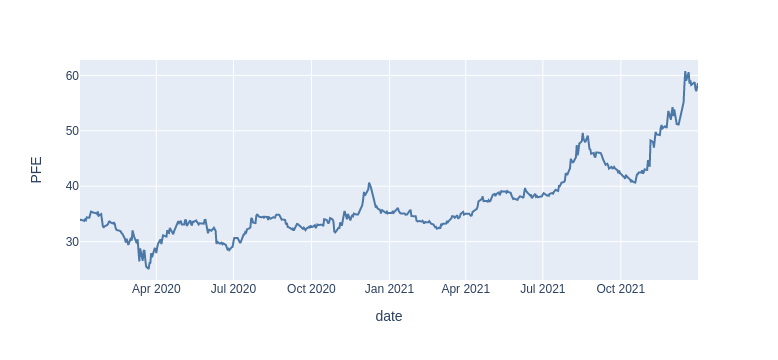

In [29]:
px.line(data_frame=data, y='PFE', color_discrete_sequence=px.colors.qualitative.T10)

## !!!AREA UNDER CONSTRUCTION!!!

In [69]:
#create subsets to explore distinct covid waves
wave1 = data[['PFE','daily_cases',]].loc['2020-03-23':'2020-05-10']
wave2 = data[['PFE','daily_cases']].loc['2020-06-23':'2020-09-11']
wave3 = data[['PFE','daily_cases']].loc['2020-10-10':'2021-02-18']
wave4 = data[['PFE','daily_cases']].loc['2021-07-01':'2021-10-22']
wave5 = data[['PFE','daily_cases']].loc['2021-12-01':'2021-12-31']

In [ ]:
wave1.corr()

In [70]:
#calculate stock price relative increases for each wave
w1_PFEi = ((wave1['PFE'].max() / wave1['PFE'].min())-1)*100
w2_PFEi = ((wave2['PFE'].max() / wave2['PFE'].min())-1)*100
w3_PFEi = ((wave3['PFE'].max() / wave3['PFE'].min())-1)*100
w4_PFEi = ((wave4['PFE'].max() / wave4['PFE'].min())-1)*100
w5_PFEi = ((wave5['PFE'].max() / wave5['PFE'].min())-1)*100

In [71]:
#calculate covid case relative increases for each wave
w1_casesi = ((wave1['daily_cases'].max() / wave1['daily_cases'].min())-1)*100
w2_casesi = ((wave2['daily_cases'].max() / wave2['daily_cases'].min())-1)*100
w3_casesi = ((wave3['daily_cases'].max() / wave3['daily_cases'].min())-1)*100
w4_casesi = ((wave4['daily_cases'].max() / wave4['daily_cases'].min())-1)*100
w5_casesi = ((wave5['daily_cases'].max() / wave5['daily_cases'].min())-1)*100